# Introduction

Like Perceptron Learning Algorithm (PLA), Support Vector Machine (SVM) only works when the data of 2 classes is linearly separable. Naturally, we also want SVM to be able to work with data that is nearly linearly separable like Logistic Regression does.

It is recommended that you read Support Vector Machine before reading this notebook.

Consider the 2 examples in Figure below:

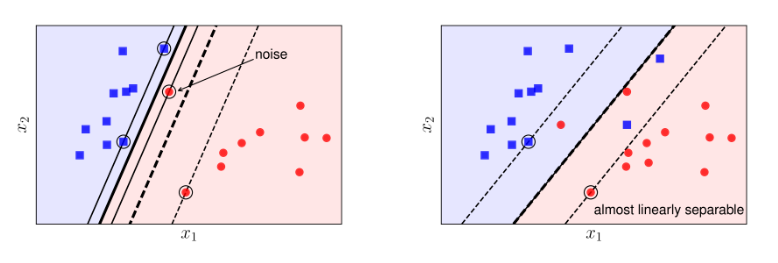

There is 2 cases:
- Case 1 (left): The data is linearly separable. In this case, SVM can find the optimal hyperplane that separates the 2 classes. But if we use pure SVM, we will get a very small margin. In addition, the classification line is too close to the blue square class and too far from the red circle class. Meanwhile, if we sacrifice this noise point, we get a much better margin depicted by the dashed lines. Pure SVM is therefore also considered sensitive to noise.
- Case 2 (right): In this case, if we use pure SVM, it is clear that the optimization problem is infeasible, that is, the feasible set is an empty set, so the SVM optimization problem becomes unsolvable. However, if we sacrifice a little bit of the points near the boundary between the two classes, we can still create a pretty good separation line as shown in the bold dashed line.

So in both cases, margin created by a dashes line called **soft margin** while the thin line is **hard margin**.

Soft Margin SVM have 2 way to engage with, both return good results and can be used to develop a complex SVM version.

- ***First way***: We solve it like a optimization problem with constrants like previous one. This method is a basis for Kernel SVM with data that is not linearly separable.

- ***Second way***: Turn it into a unconstrained optimization problem. Can be solve by using Gradient Descent, can be applied into large dataset. Also we will see new loss function called Hinge Loss. (Already introduced in 0.5 Loss folder notebook)

# Mathematic analysis

To have a bigger *margin* in SVM, we have to sacrifice some points. The points that are sacrificed are called **slack variables**. And of course, we have to limit the number of points that can be sacrificed, if not, the margin will be too large and the model will be overfitting. So the target should be a **balance between the margin and minimize the number of points that are sacrificed**.

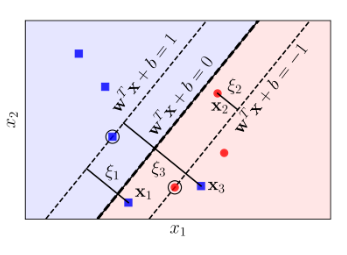

Where slack is denoted by $\xi$

With $x_i$ point lies in a safe zone, $\xi_i = 0$. With any point $x_i$ lies in the wrong side of the margin, $\xi_i > 0$. If $y_i = \pm 1$ is the label of $x_i$ in unsafe zone then $\xi_i = |w^T x_i + b - y_i|$

Recall Hard Margin SVM:

$$(w, b) = \arg \min_{w, b} \frac{1}{2} ||w||^2 \\
\text{subject to } y_i(w^T x_i + b) \geq 1, \forall i$$

So with Soft Margin, the loss function will add one more term to the objective function:

$$\frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \xi_i$$

Where $C$ is a positive hyperparameter and $\xi_i$ is the slack variable

The $C$ hyperparameter is used to balance the trade-off between the margin and the number of points that are sacrificed. Can be ***pre-defined*** or use ***cross-validation*** to find the best value.

With each pairs $(x_i, y_i)$, instead of hard constraint $y_i(w^T x_i + b) \geq 1$, we have a soft constraint:

$$y_i(w^T x_i + b) \geq 1 - \xi_i \Leftrightarrow 1 - \xi_i - y_i(w^T x_i + b) \leq 0$$

To summarize, the optimization problem of Soft Margin SVM is:

$$\min_{w, b, \xi} \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \xi_i \\
\text{subject to } 1 - \xi_i - y_i(w^T x_i + b) \leq 0, \forall i \\
- \xi_i \leq 0, \forall i$$

**Note that:**
- If $C$ small, the sacrifice high or low will not affect the result much. The algorithm will adjust $\|w\|_2^2$ smaller to get a bigger margin. If $C$, it will focus on the sacrifice, the margin will be smaller. Beside, in case $C$ very big and the data is linearly separable, it will return the same result as Hard Margin SVM.
- The optimization problem is a convex optimization problem, so it has a global minimum.

# Lagrangian duality problem

### Slater condition

It's very clearly that with every $n = 1, 2, \cdots, N$ and $(w, b)$, the Slater condition is satisfied. So the optimization problem is convex, which alway find a $\xi$ big enough so that:

$$y_n(w^T x_n + b) + \xi_n > 1, \forall n$$

### Lagrangian of Soft Margin SVM

Lagrangian for the optimization problem of Soft Margin SVM:

$$\mathcal{L}(w, b, \xi, \lambda, \mu) = \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \lambda_i(1 - \xi_i - y_i(w^T x_i + b)) - \sum_{i=1}^{n} \mu_i \xi_i$$

Where $\lambda_i \geq 0, \mu_i \geq 0$

### Duality problem

We have:

$$g(\lambda, \mu) = \min_{w, b, \xi} \mathcal{L}(w, b, \xi, \lambda, \mu)$$

With each pair $(\lambda, \mu)$, we will consider $(w, b, \xi)$ as a satisfied condition of Lagrangian derivative:

$$\frac{\partial \mathcal{L}}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^{n} \lambda_i y_i x_i$$

$$\frac{\partial \mathcal{L}}{\partial b} = 0 \Rightarrow \sum_{i=1}^{n} \lambda_i y_i = 0$$

$$\frac{\partial \mathcal{L}}{\partial \xi_i} = 0 \Rightarrow  \lambda_i = C  - \mu_i$$

From the last equation, we only consider to pair $(\lambda, \mu)$ that satisfy $\lambda_i \geq 0, \mu_i \geq 0$ and $\lambda_i = C - \mu_i \geq 0 \Rightarrow 0 \leq \mu_i \leq C$. Replace into the Lagrangian, we have the dual problem:

$$g(\lambda, \mu) = \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j x_i^T x_j$$

Note that this function not depend on $\mu$ but we need to check the constraint $\lambda_i = C - \mu_i$. So the dual problem is:

$$\lambda = \arg \max_{\lambda} g(\lambda) \\
\text{subject to } \sum_{i=1}^{n} \lambda_i y_i = 0 \\
0 \leq \lambda_i \leq C, \forall i$$

### KKT conditions

KKT conditions of optimization problem of Soft Margin SVM:

$$1 - \xi_i 0 y_i(w^T x_i + b) \leq 0 \\
- \xi_i \leq 0 \\
\lambda_i \geq 0 \\
\mu_i \geq 0 \\
\lambda_i(1 - \xi_i - y_i(w^T x_i + b)) = 0 \\
\mu_i \xi_i = 0 \\
w = \sum_{i=1}^{n} \lambda_i y_i x_i \\
\sum_{i=1}^{n} \lambda_i y_i = 0 \\
\lambda_i = C - \mu_i$$
$$

We have some observation:
- If $\lambda_i = 0$ then from last condition, we can deduce $\mu_i = C \neq 0$. So $\xi_i = 0$ and $y_i(w^T x_i + b) \geq 1$. This is the case of safe zone.
- If $\lambda_i > 0$ then $y_i(w^T x_i + b) = 1 - \xi_i$
    - If $0 < \lambda_i < C$ then $\mu_i \neq 0$ which mean $\xi_i = 0$ to satisfy the condition. In other words, $y_i(w^T x_i + b) = 1$ which $x_i$ lies on the margin.
    - If $\lambda_i = C$ then $\mu_i = 0$ which mean $\xi_i$ accept non negative variable. If $\xi_i \leq 1$, $x_i$ will not be missclassified (Still right at any side of the margin). In contrast, all points with $\xi_i > 1$ will be missclassified.
    - $\lambda_i$ cannot be greater than $C$ because $\mu_i$ must be non-negative.

Beside, all the point corresponding to $0 < \lambda_i < C$ are called **support vectors**.





Set $\mathcal{M} = \{i : 0 < \lambda_i < C\}$, and $\mathcal{S} = \{i : 0 < \lambda_i \leq C\}$. Which $\mathcal{M}$ is a set of indices of points that lie exactly on the margins - aids in calculating $b$. $\mathcal{S}$ is a set of index of support vectors - aids in calculating $w$. We have:

$$w = \sum_{i \in \mathcal{S}} \lambda_i y_i x_i$$

$$b = \frac{1}{|\mathbb{N}_{\mathcal{M}}|} \sum_{i \in \mathcal{M}} (y_i - \sum_{j \in \mathcal{S}} \lambda_j y_j x_j^T x_i)$$

# Optimization problem without constraints for Soft Margin SVM

### Optimization problem without constraints equivalent to the original problem

Attention that, the first constraint:

$$1 - \xi_i - y_i(w^T x_i + b) \leq 0 \Leftrightarrow \xi_i \geq 1 - y_i(w^T x_i + b)$$

Combine with $\xi_i \geq 0$, we have:

$$(w, b, \xi) = \arg \min_{w, b, \xi} \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \xi_i \\
\text{subject to } \xi_i \geq \max(0, 1 - y_i(w^T x_i + b)), \forall i$$

To turn this problem into unconstrained problem, we will prove the following statement by contradiction:

If $(w, b, \xi)$ is final solution, thus the target function is smallest:

$$\xi_i = \max(0, 1 - y_i(w^T x_i + b))$$

But if we assume there is an $i$ value that:

$$\xi_i > \max(0, 1 - y_i(w^T x_i + b))$$

We choose $\xi_i' = \max(0, 1 - y_i(w^T x_i + b))$, we will have a smaller value of target function while still satisfy the constraint. So the assumption is conflict with the statement.

Then, we can turn the optimization problem into unconstrained problem:

$$(w, b, \xi)  = \arg \min_{w, b, \xi} \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i(w^T x_i + b)) \\
\text{subject to } \xi_i = \max(0, 1 - y_i(w^T x_i + b)), \forall i$$

And from here $\xi$ is no more important in this problem, we can remove it without affecting the result:

$$(w, b) = \arg \min_{w, b} \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i(w^T x_i + b))$$

### Hinge loss

Recall cross-entropy, with each pair of coefficient $(w, b)$ and data point, label $(x_i, y_i)$, set $z_i = w^T x_i + b$ and $a_n = \sigma(z_i)$:

$$J_i^1(w, b) = -y_i \log(a_i) - (1 - y_i) \log(1 - a_i)$$

We already know that cross entropy predict value is small if the probability of $a_i$ is close to $y_i$ (range from 0 to 1).

Here, we will introduce a new loss function called **Hinge loss**:

$$J_i (w, b) = \max(0, 1 - y_i(w^T x_i + b))$$

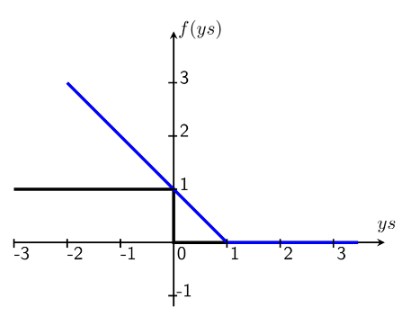

Where Hinge Loss (blue line), zeros-one loss (black line).

The output $y$ is a multiply of expect output (ground truth) and predict output (score). With right prediction, the output $s$ have a same sign with $y$. In contrast:
- With zeros-one loss, the output is always 1 if the prediction is wrong. Points with scores opposite to the desired output will cause the same loss (equal to 1), regardless of whether they are near or far from the dividing line (vertical axis). This is a discrete function, very difficult to optimize and it is also difficult to measure the sacrifice as defined in the beginning.
- With Hinge loss, the output lie in safe zone, which $ys \geq 1$, cause no loss. Middle zone, $0 < ys < 1$, cause a small loss. Unsafe zone, $ys < 0$, cause a bigger loss. This is a continuous function, easy to optimize and measure the sacrifice.

### Loss function

Now if we consider the Soft Margin SVM under of Hinge Loss:

With each pair $(w, b)$, set:

$$L_n(w, b) = \max(0, 1 - y_i(w^T x_i + b))$$

Take all the sum of this *loss* by $n$ we got:

$$L(w, b) = \sum_{i=1}^{n} L_n(w, b) = \sum_{i=1}^{n} \max(0, 1 - y_i(w^T x_i + b))$$

The question is, if we directly optimize the sum of hinge loss then what will happen?

In cases where the data is linearly separable, we will have optimize value of $L(w, b) = 0$:

$$1 - y_n(aw^Tx_n + ab) \leq 0, \forall n \\
\Rightarrow 1 - y_n(aw^Tx_n + ab) \leq 1 - a < 0, \forall n$$

This mean $aw, ab$ is also the problem solution. If there's no more constraint, the problem can be lead to unstable solution because the coefficients can be infinitely large.

To prevent this, we need to add another term into $L(w, b)$ called **regularization term** (Which already introduced in Overfitting notebook):

$$J(w, b) = L(w, b) + \lambda R(w, b)$$

With $\lambda$ is a positive values, $R(w, b)$ will help to prevent the coefficients from being too large. The most common regularization term is $L_2$ regularization:

$$J(w, b) = \sum_{n = 1}^N \max(0, 1 - y_n(w^T x_n + b)) + \frac{\lambda}{2} \|w\|_2^2$$

This method called **weight decay**. Also to be cleared, weight decay is different from L2 in the loss function. L2 in the loss function is used to measure the sacrifice, while weight decay is used to prevent the coefficients from being too large.

And weight decay **will not** apply to $b$.

This version of Loss will have the same results as the original optimization problem without constraints when $\lambda = \frac{1}{C}$.

Realize that, we can turn the unconstrained problem more simple by using *bias trick* like Linear Regression or in Neural Network. By extending the input data with a constant value 1, then $x_i \in \mathbb{R}^{d+1}$ and $\bar{w} \in \mathbb{R}^{d+1}$, we can remove $b$ from the optimization problem:

$$J(w) = \sum_{n = 1}^N \max(0, 1 - y_n \bar{w}^T x_n) + \frac{\lambda}{2} \|\bar{w}\|_2^2$$

This is a convex function:
- $1 - y_n \bar{w}^T x_n$ is a linear function of $\bar{w}$.
- $\max(0, 1 - y_n \bar{w}^T x_n)$ is a convex function.
- Norm 2 is a convex function.
- Sum of convex functions is a convex function.

### Optimization loss function

First we need to compute derivative of loss function by $\bar{w}$.

We will skip the regularization term because it's easy to compute derivative.

With Hinge loss, we will have 2 cases:
- If $1 - y_i \bar{w}^T x_i \leq 0$, the derivative is 0.
- If $1 - y_i \bar{w}^T x_i > 0$, the derivative is $-y_i x_i$

Set:

$$Z = [y_1\bar{w}_1, y_2\bar{w}_2, \cdots, y_n\bar{w}_n]$$

$$u = [y_1\bar{w}^T\bar{x}_1, y_2\bar{w}^T\bar{x}_2, \cdots, y_n\bar{w}^T\bar{x}_n] = \bar{w}^TZ$$

Remember that $u$ is a column vector

We have to identify the index of $u$ that $u_i \leq 1$ and thus the second case:

$$\mathcal{H} = \{i : u_i < 1\}$$

Then the derivative of loss function by $\bar{w}$ is:

$$\nabla J(\bar{w}) = \sum_{i \in \mathcal{H}} -y_i \bar{x_i} + \lambda \begin{bmatrix} w \\ 0 \end{bmatrix}$$

And the final update rules:

$$\bar{w} = \bar{w} - \eta \nabla J(\bar{w})$$

# Conclusion

- Pure SVM (Hard Margin SVM) does not work well when there is noise near the boundary or even when the data between two classes is almost linearly separable. Soft Margin SVM can help to overcome this.
- The first way is to solve the dual problem. The dual problem of Soft Margin SVM is very similar to the dual problem of Hard Margin SVM, except for the upper bound constraint on the Laggrange multipliers. This constraint is also called the box costraint.
- In Soft Margin SVM, there is a constant that must be chosen, which is $C$. This approach is also called $C$-SVM. In addition, there is another commonly used approach, called $\nu$-SVM.